#**Objective:**
 WAP to train and evaluate a convolutional neural network using Keras Library to classify MNIST fashion dataset. Demonstrate the effect of filter size, regularization, batch size and optimization algorithm on model performance.**bold text**

## **Description of the Model**




*   Three convolutional layers with configurable filter sizes (3x3, 5x5).
*   Dropout layers for regularization to reduce overfitting.
*   Batch normalization to improve stability and convergence speed.
*   Fully connected layers for classification.
*   Softmax output layer for multi-class classification.
*   Different optimization algorithms (Adam, RMSprop) for comparison.









29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training model with filter_size=3, reg=0.001, batch_size=32, optimizer=adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with filter_size=3, reg=0.001, batch_size=32, optimizer=sgd
Training model with filter_size=3, reg=0.001, batch_size=64, optimizer=adam
Training model with filter_size=3, reg=0.001, batch_size=64, optimizer=sgd
Training model with filter_size=3, reg=0.01, batch_size=32, optimizer=adam
Training model with filter_size=3, reg=0.01, batch_size=32, optimizer=sgd
Training model with filter_size=3, reg=0.01, batch_size=64, optimizer=adam
Training model with filter_size=3, reg=0.01, batch_size=64, optimizer=sgd
Training model with filter_size=5, reg=0.001, batch_size=32, optimizer=adam
Training model with filter_size=5, reg=0.001, batch_size=32, optimizer=sgd
Training model with filter_size=5, reg=0.001, batch_size=64, optimizer=adam
Training model with filter_size=5, reg=0.001, batch_size=64, optimizer=sgd
Training model with filter_size=5, reg=0.01, batch_size=32, optimizer=adam
Training model with filter_size=5, reg=0.01, batch_size=32, optimizer=sgd
Training model with filte

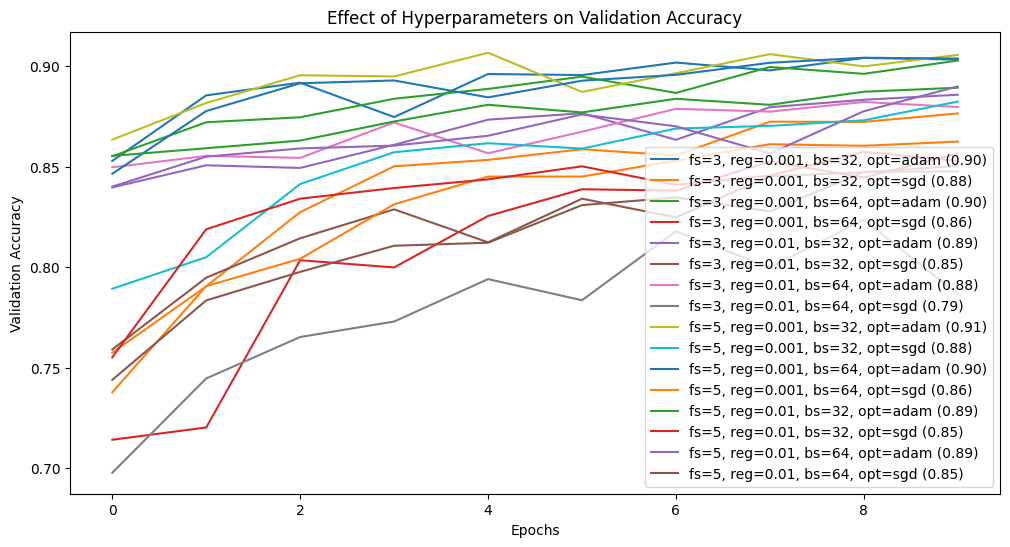

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

def create_model(filter_size=3, regularization=0.001, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', kernel_regularizer=regularizers.l2(regularization), input_shape=(28, 28, 1)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(regularization)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

filter_sizes = [3, 5]
regularization_values = [0.001, 0.01]
batch_sizes = [32, 64]
optimizers = ['adam', 'sgd']

results = {}
for filter_size in filter_sizes:
    for reg in regularization_values:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                print(f"Training model with filter_size={filter_size}, reg={reg}, batch_size={batch_size}, optimizer={optimizer}")
                model = create_model(filter_size, reg, optimizer)
                history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                results[(filter_size, reg, batch_size, optimizer)] = (history, test_acc)

plt.figure(figsize=(12, 6))
for key, (history, acc) in results.items():
    filter_size, reg, batch_size, optimizer = key
    plt.plot(history.history['val_accuracy'], label=f'fs={filter_size}, reg={reg}, bs={batch_size}, opt={optimizer} ({acc:.2f})')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Effect of Hyperparameters on Validation Accuracy')
plt.show()

## **Description of the Code**
**Data Preparation:**



Loads the Fashion MNIST dataset.

Normalizes pixel values (scaling between 0 and 1).

Reshapes data to match CNN input requirements.




**Model Creation (create_model):**





Builds a CNN with tunable hyperparameters (filter size, regularization strength, and optimizer).

Uses L2 regularization to prevent overfitting.

Configures an optimizer (Adam or SGD) during compilation.

**Hyperparameter Experimentation:**

Iterates over combinations of filter size, regularization, batch size, and optimizer.

Trains a CNN model for each combination on Fashion MNIST for 10 epochs.

Records the validation accuracy for analysis.

**Performance Evaluation:**

Plots validation accuracy across epochs for different hyperparameter settings.

Compares models based on final accuracy scores.



## **Performance Evaluation**


1.   Filter Size: Larger filters (5×5) may capture more complex patterns but increase computation. Smaller filters (3×3) can preserve finer details.
2.   Regularization: Higher L2 regularization (0.01) discourages large weights, preventing overfitting but possibly reducing accuracy.
1.   Batch Size: Smaller batch sizes (32) introduce more noise during training but can help escape local minima, while larger batches (64) provide smoother updates.
2.  Optimizer:

Adam generally provides better convergence and stability.

SGD may require careful tuning (learning rate adjustment) but sometimes generalizes better







##**MY COMMENTS**



*   The combination of filter size, regularization, batch size, and optimizer plays a crucial role in achieving the best accuracy.
*   Higher regularization reduces overfitting but may hurt accuracy if too strong.



